In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
from bs4 import BeautifulSoup

In [2]:
CLIENT_ID = 'OVO4PKGIUFOTL1CFBRWNYD1R1KAK233BSXMEIL2EET0YSF1W' 
CLIENT_SECRET = 'XGGDYM10OPMAEVCIJ5LMIU2YMJMTBCKRF54JFPFH3P3JXF4G' 
VERSION = '20210120' 

In [63]:
def get_nearby_venues(names, latitudes, longitudes, radius = 1000, limit = 100):
    
    venues_list = []
    
    for name, latitude, longitude in zip(names, latitudes, longitudes):
        
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        latitude,
        longitude,
        radius,
        limit)
    
        results = requests.get(url).json()['response']['groups'][0]['items']
    
        venues_list.append([(name,
                         latitude,
                         longitude,
                         v['venue']['name'],
                         v['venue']['location']['lat'],
                         v['venue']['location']['lng'],
                         v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        
    nearby_venues.columns = ['Name',
                             'Latitude',
                             'Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    return(nearby_venues)

In [64]:
DT_data = pd.read_csv('/Users/roxanneli/Desktop/City of Hamilton/City Dt Coordinates.csv')
DT_data

,City,Latitude,Longitude
0,Toronto DT,43.652503,-79.383558
1,Hamilton DT,43.258000,-79.869000
2,Mississauga DT,43.593056,-79.642778
3,Markham DT,43.850000,-79.320000
4,Burlington DT,43.322920,-79.794190
5,Brampton DT,43.686944,-79.762222


In [65]:
venues = get_nearby_venues(names = DT_data['City'],
                           latitudes = DT_data['Latitude'],
                           longitudes = DT_data['Longitude'])
venues.head()

Toronto DT
Hamilton DT
Mississauga DT
Markham DT
Burlington DT
Brampton DT


,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Toronto DT,43.652503,-79.383558,Downtown Toronto,43.653232,-79.385296,Neighborhood
1,Toronto DT,43.652503,-79.383558,Nathan Phillips Square,43.652270,-79.383516,Plaza
2,Toronto DT,43.652503,-79.383558,Four Seasons Centre for the Performing Arts,43.650592,-79.385806,Concert Hall
3,Toronto DT,43.652503,-79.383558,Indigo,43.653515,-79.380696,Bookstore
4,Toronto DT,43.652503,-79.383558,LUSH,43.653557,-79.380400,Cosmetics Shop


## From the following table, we can see within a radius of 1000m from Downtown area, Toronto and Hamilton have the most number of venues to go.

                # of Venues
Hamilton DT             100
Toronto DT              100
Mississauga DT           80
Burlington DT            63
Markham DT               38
Brampton DT              36


Text(0, 0.5, 'Venues')

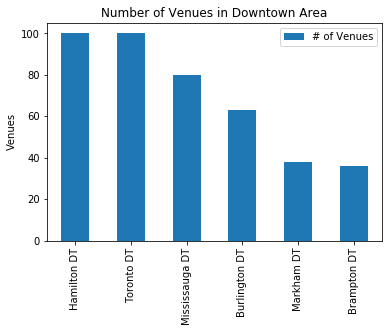

In [108]:
num_of_venues = venues.Name.value_counts().to_frame().rename(columns = {'Name': '# of Venues'})
print(num_of_venues)

num_of_venues.plot(kind = 'bar')
plt.title('Number of Venues in Downtown Area')
plt.ylabel('Venues')

## From the following table, we can see within a radius of 1000m from Downtown area, Toronto and Hamilton have the most number of different types of venues to go.

Toronto DT area (radius of 1km) has 64 different venue categories
Hamilton DT area (radius of 1km) has 60 different venue categories
Mississauga DT area (radius of 1km) has 49 different venue categories
Markham DT area (radius of 1km) has 31 different venue categories
Burlington DT area (radius of 1km) has 44 different venue categories
Brampton DT area (radius of 1km) has 29 different venue categories


Text(0.5, 1.0, 'Number of Venue Types')

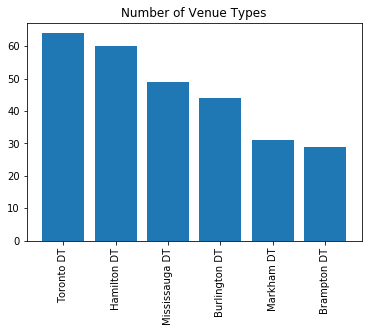

In [143]:
list_ = []
for name in DT_data.City:
    
    city_venues = venues[venues['Name'] == name]
    num = len(city_venues['Venue Category'].unique())
    
    print(f'{name} area (radius of 1km) has {num} different venue categories')
    list_.append([name, num])
              
venue_categories = pd.DataFrame(list_)
venue_categories.sort_values(by = 1, ascending = False,inplace = True)
venue_categories.columns = ['City','# of Venue Categories']

plt.bar(x = 'City', height = '# of Venue Categories', data = venue_categories)
plt.xticks(rotation=90)
plt.title('Number of Venue Types')


In [144]:
venues

,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Toronto DT,43.652503,-79.383558,Downtown Toronto,43.653232,-79.385296,Neighborhood
1,Toronto DT,43.652503,-79.383558,Nathan Phillips Square,43.652270,-79.383516,Plaza
2,Toronto DT,43.652503,-79.383558,Four Seasons Centre for the Performing Arts,43.650592,-79.385806,Concert Hall
3,Toronto DT,43.652503,-79.383558,Indigo,43.653515,-79.380696,Bookstore
4,Toronto DT,43.652503,-79.383558,LUSH,43.653557,-79.380400,Cosmetics Shop
...,...,...,...,...,...,...,...
412,Brampton DT,43.686944,-79.762222,Garden Square,43.688469,-79.772801,Plaza
413,Brampton DT,43.686944,-79.762222,Queen Lynch Pharmacy,43.692031,-79.753122,Pharmacy
414,Brampton DT,43.686944,-79.762222,Memorial Arena,43.678855,-79.759016,Skating Rink
415,Brampton DT,43.686944,-79.762222,David Dash Memorial Field,43.678332,-79.761043,Baseball Field


In [145]:
venues_oh = pd.get_dummies(venues[['Venue Category']], prefix = "", prefix_sep = "")

venues_oh['Name'] = venues['Name']

fixed_columns = [venues_oh.columns[-1]] + list(venues_oh.columns[:-1])
venues_oh = venues_oh[fixed_columns]

venues_oh.head()

,Name,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Toronto DT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Toronto DT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Toronto DT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Toronto DT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Toronto DT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
venues_oh_grouped = venues_oh.groupby('Name').mean().reset_index()
venues_oh_grouped

,Name,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Brampton DT,0.000000,0.00,0.027778,0.000000,0.000000,0.00,0.000000,0.027778,0.000000,...,0.000000,0.027778,0.000000,0.00,0.0000,0.027778,0.00,0.000000,0.027778,0.000000
1,Burlington DT,0.015873,0.00,0.000000,0.000000,0.015873,0.00,0.015873,0.031746,0.015873,...,0.000000,0.015873,0.015873,0.00,0.0000,0.000000,0.00,0.031746,0.015873,0.000000
2,Hamilton DT,0.010000,0.01,0.000000,0.000000,0.020000,0.01,0.020000,0.010000,0.050000,...,0.000000,0.010000,0.010000,0.01,0.0000,0.000000,0.00,0.000000,0.030000,0.000000
3,Markham DT,0.000000,0.00,0.000000,0.026316,0.000000,0.00,0.052632,0.052632,0.000000,...,0.026316,0.000000,0.000000,0.00,0.0000,0.000000,0.00,0.000000,0.000000,0.026316
4,Mississauga DT,0.000000,0.00,0.000000,0.000000,0.012500,0.00,0.025000,0.012500,0.025000,...,0.012500,0.000000,0.000000,0.00,0.0125,0.000000,0.00,0.000000,0.000000,0.012500
5,Toronto DT,0.020000,0.01,0.010000,0.010000,0.010000,0.00,0.010000,0.000000,0.000000,...,0.000000,0.010000,0.040000,0.00,0.0000,0.000000,0.01,0.010000,0.000000,0.010000


In [147]:
def return_most_common_venues(row, num):
    new_row = row.iloc[1:]
    new_row_sorted = new_row.sort_values(ascending = False)
    
    return new_row_sorted.index.values[0: num]

In [148]:
num_top_venues = 5

ind = ['st','nd','rd']
columns = ['City']
for i in range(num_top_venues):
    try:
        columns.append(f'{i+1}{ind[i]} Most Common Venue')
    except:
        columns.append(f'{i+1}th Most Common Venue')
        
city_venues_sorted = pd.DataFrame(columns = columns)
city_venues_sorted['City'] = venues_oh_grouped['Name']

for num in range(venues_oh_grouped.shape[0]):
    city_venues_sorted.iloc[num, 1:] = return_most_common_venues(venues_oh_grouped.iloc[num, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Brampton DT,Park,Coffee Shop,Pub,Restaurant,Pizza Place
1,Burlington DT,Coffee Shop,Pub,Restaurant,Sports Bar,Bank
2,Hamilton DT,Pub,Coffee Shop,Café,Bar,Middle Eastern Restaurant
3,Markham DT,Dessert Shop,Sporting Goods Shop,Bakery,Bank,Burger Joint
4,Mississauga DT,Coffee Shop,Clothing Store,Performing Arts Venue,Juice Bar,Indian Restaurant
5,Toronto DT,Coffee Shop,Café,Gastropub,Theater,Pizza Place
